In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import biosppy.signals.ecg as ecg
from pandas import Series

In [2]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")

In [3]:
X_train = X_train.set_index('id')
y_train = y_train.set_index('id')
X_test = X_test.set_index('id')

In [4]:
X_train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x17832,x17833,x17834,x17835,x17836,x17837,x17838,x17839,x17840,x17841
id,,,,,,,,,,,,,,,,,,,,,
0,-64,-66,-69,-72,-75,-77,-80,-86,-89,-83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,505,500,496,492,487,480,475,476,483,495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-21,-16,-12,-7,-3,0,1,2,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-211,-457,-635,-710,-715,-663,-573,-481,-401,-337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36,32,29,25,22,19,17,15,12,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,-285,-303,-334,-376,-413,-432,-443,-451,-460,-468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5113,50,51,50,48,46,44,42,39,36,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5114,-207,-225,-242,-258,-266,-271,-275,-279,-281,-284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
y_train

,y
id,
0,0
1,0
2,0
3,1
4,2
...,...
5112,3
5113,0
5114,0


In [6]:
def display_heartbeats(row, ax, title):
    x = row.dropna().to_numpy()
    out = ecg.ecg(signal=x, sampling_rate=300., show=False)
    templates = out['templates']
    mu = np.mean(templates, axis=0) 
    var = np.std(templates, axis=0)
    ax.plot(range(mu.shape[0]), mu)
    ax.set_title(title)
    # Fill the variance range
    ax.fill_between(range(mu.shape[0]), mu - var, mu + var, linewidth=0, alpha=0.1)

In [7]:
def display_class(cls, num_pictures = 9):
    X = X_train[y_train['y'] == cls]
    num_cols = 3
    num_rows = num_pictures // num_cols
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    i, j = 0, 0
    for index, row in X.head(num_pictures).iterrows():
        display_heartbeats(row, ax[i, j], f"Data point {index}, class {cls}")
        j += 1
        if j == num_cols:
            i += 1
            j = 0
    plt.show()

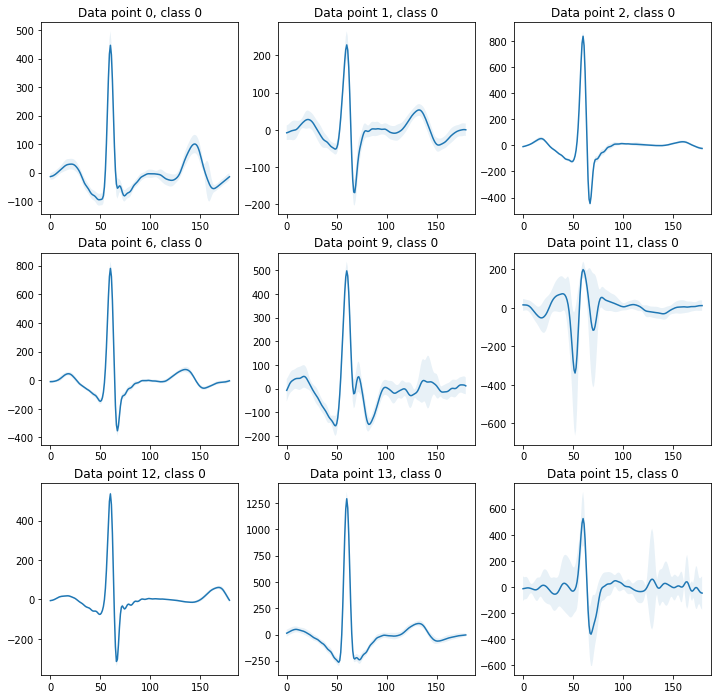

In [49]:
display_class(0)

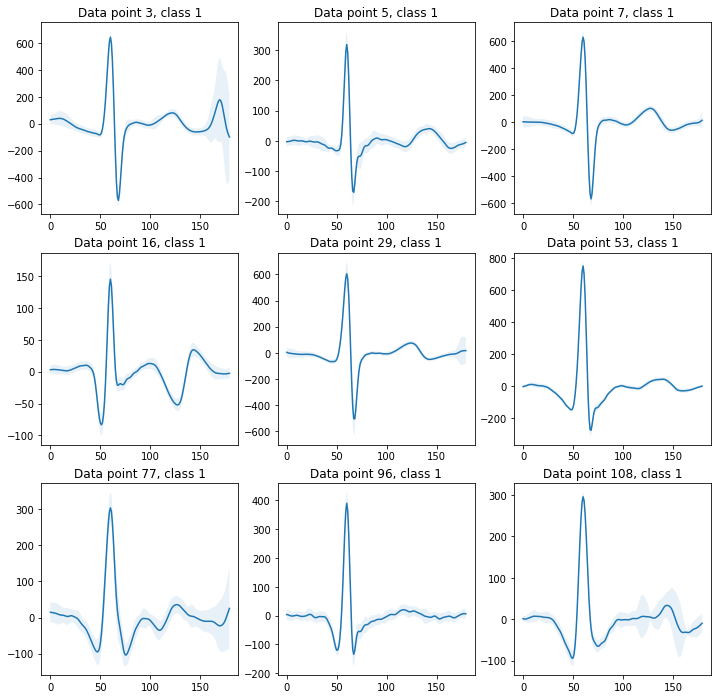

In [50]:
display_class(1)

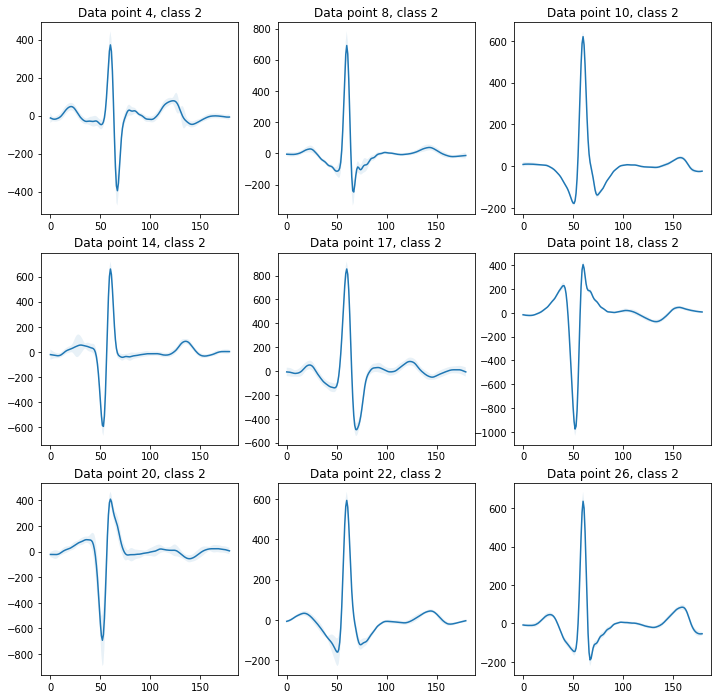

In [51]:
display_class(2)

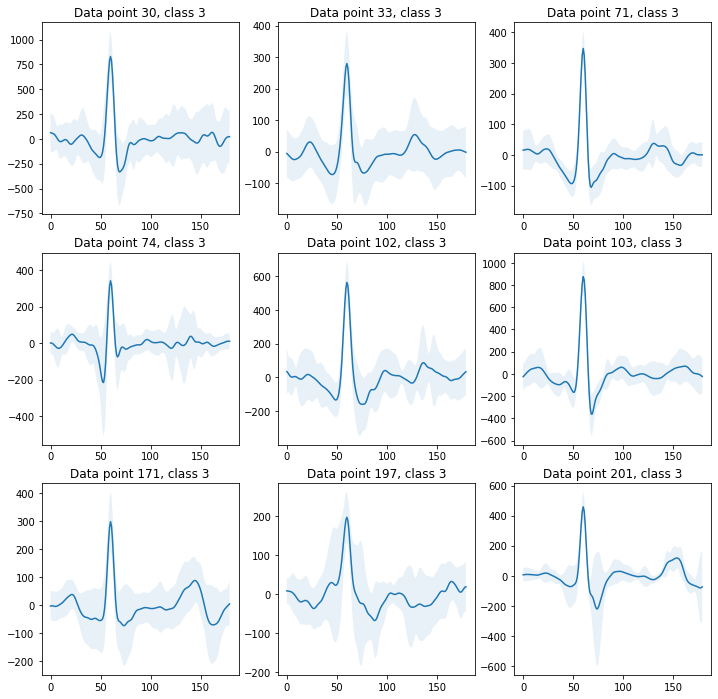

In [52]:
display_class(3)

# NeuroKit2

In [8]:
import neurokit2 as nk

In [9]:
def display_heartbeats_nk(row, title):
    fig = plt.figure(figsize=(8,6))
    ecg_signal = row.dropna().to_numpy()
    ecg_cleaned = nk.ecg.ecg_clean(ecg_signal, sampling_rate=300)
    # Extract R-peaks locations
    _, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=300)
    # Delineate the ECG signal
    _, waves_dwt = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=300, method="cwt", show=True, show_type='all')
#     # Visualize the T-peaks, P-peaks, Q-peaks and S-peaks
#     plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:3],
#                            waves_peak['ECG_P_Peaks'][:3],
#                            waves_peak['ECG_Q_Peaks'][:3],
#                            waves_peak['ECG_S_Peaks'][:3],
#                            rpeaks['ECG_R_Peaks'][:3]], ecg_signal[:1000])
#     print(len(waves_peak['ECG_T_Peaks']), len(waves_peak['ECG_P_Peaks']), len(waves_peak['ECG_Q_Peaks']), len(waves_peak['ECG_S_Peaks']), len(rpeaks['ECG_R_Peaks']))
    plt.title(title)
    plt.show()

In [10]:
def display_class_nk(cls, num_pictures = 10):
    X = X_train[y_train['y'] == cls]
    for index, row in X.head(num_pictures).iterrows():
        display_heartbeats_nk(row, f"Data point {index}, class {cls}")

<Figure size 576x432 with 0 Axes>

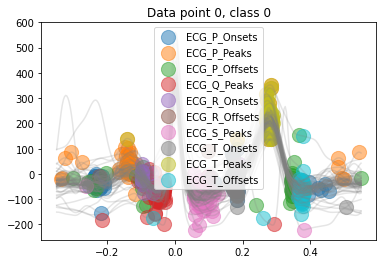

<Figure size 576x432 with 0 Axes>

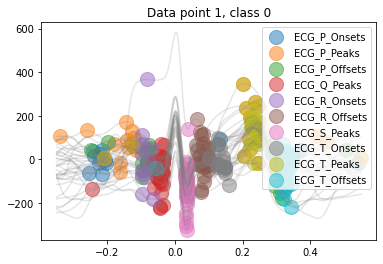

<Figure size 576x432 with 0 Axes>

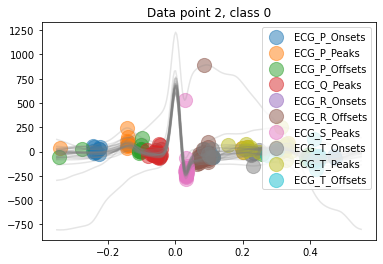

<Figure size 576x432 with 0 Axes>

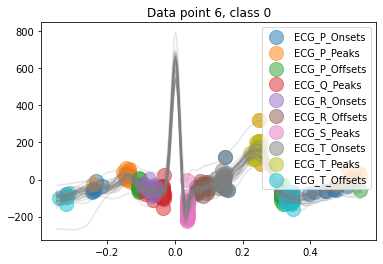

<Figure size 576x432 with 0 Axes>

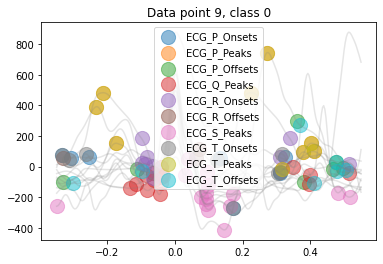

<Figure size 576x432 with 0 Axes>

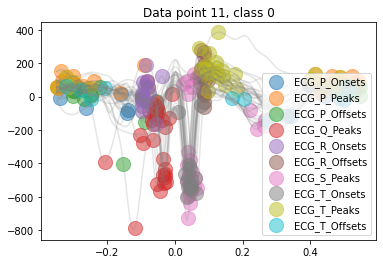

<Figure size 576x432 with 0 Axes>

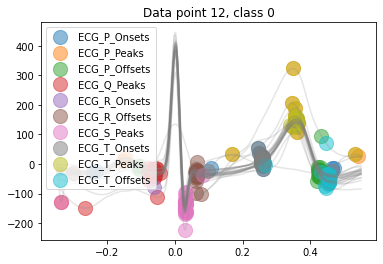

<Figure size 576x432 with 0 Axes>

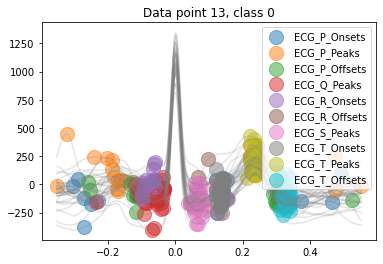

<Figure size 576x432 with 0 Axes>

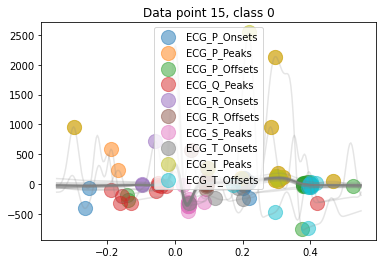

<Figure size 576x432 with 0 Axes>

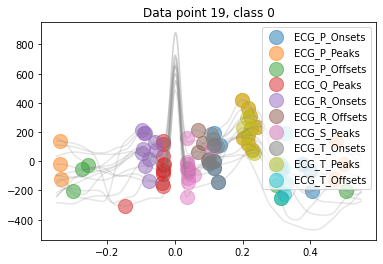

In [56]:
display_class_nk(0)

<Figure size 576x432 with 0 Axes>

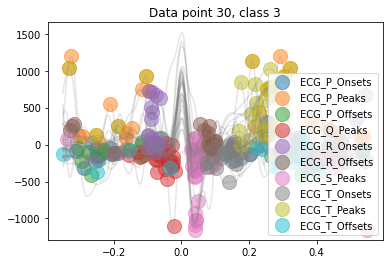

<Figure size 576x432 with 0 Axes>

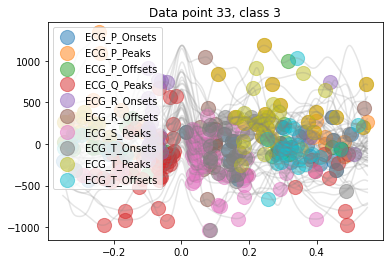

<Figure size 576x432 with 0 Axes>

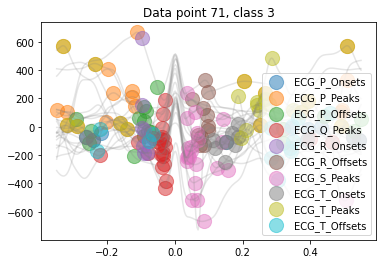

<Figure size 576x432 with 0 Axes>

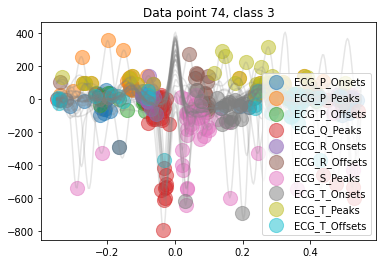

<Figure size 576x432 with 0 Axes>

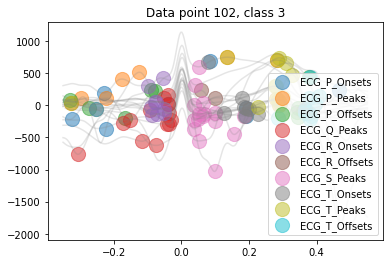

<Figure size 576x432 with 0 Axes>

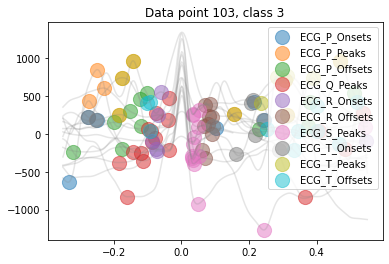

<Figure size 576x432 with 0 Axes>

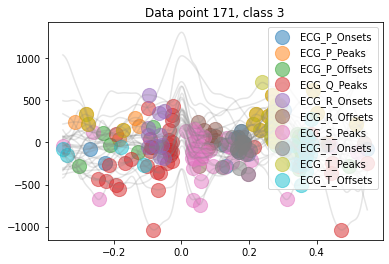

<Figure size 576x432 with 0 Axes>

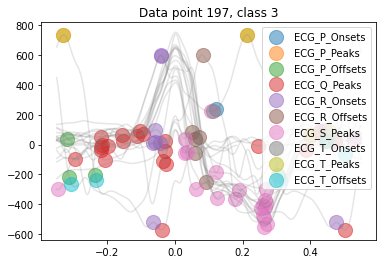

<Figure size 576x432 with 0 Axes>

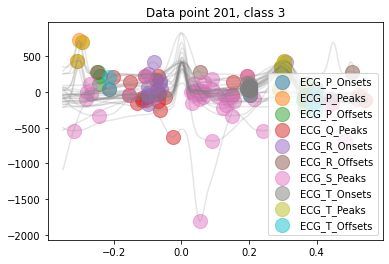

<Figure size 576x432 with 0 Axes>

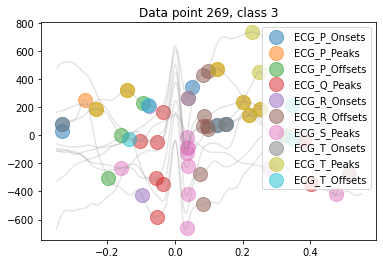

In [57]:
display_class_nk(3)

In [11]:
def add_basic_info(row, arr, name):
    if len(arr) > 0:
        row[f'std_{name}'] = arr.std()
        row[f'mean_{name}'] = arr.mean()
        row[f'median_{name}'] = np.median(arr)
        row[f'max_{name}'] = arr.max()
        row[f'min_{name}'] = arr.min()
        row[f'range_{name}'] = arr.max() - arr.min()
    return row

In [27]:
def apply_func(row):
    ecg_signal = row.dropna().to_numpy()
    ecg_cleaned = nk.ecg.ecg_clean(ecg_signal, sampling_rate=300)
#     ecg_cleaned = ecg_signal
    
    max_abs = max(ecg_cleaned.min(), ecg_cleaned.max(), key=abs)
    ecg_cleaned = ecg_cleaned / max_abs
    
#     # Extract R-peaks locations
    peaks, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=300)
    
#     RR_intervals = np.diff(rpeaks['ECG_R_Peaks'])
#     row = add_basic_info(row, RR_intervals, 'RR_intervals')
    
#     R_amplitudes = np.array([ecg_cleaned[i] for i in rpeaks['ECG_R_Peaks']])
#     row = add_basic_info(row, R_amplitudes, 'R_amplitudes')
    
#     if len(rpeaks['ECG_R_Peaks']) > 3:
#         hrv_time = nk.hrv_time(peaks, sampling_rate=300, show=False)
#         for index, hrv_time_row in hrv_time.iterrows():
#             for col in hrv_time.columns:
#                 row[col] = hrv_time_row[col]

#         hrv_freq = nk.hrv_frequency(peaks, sampling_rate=300, show=False, normalize=True)
#         for index, hrv_freq_row in hrv_freq.iterrows():
#             for col in hrv_freq.columns:
#                 row[col] = hrv_freq_row[col]
        
#         hrv_non = None
#         try:
#             hrv_non = nk.hrv_nonlinear(peaks, sampling_rate=300, show=False)
#         except ValueError:
#             print("Got ValueError")
#         if hrv_non is not None:
#             for index, hrv_non_row in hrv_non.iterrows():
#                 for col in hrv_non.columns:
#                     row[col] = hrv_non_row[col]

#     out = ecg.ecg(signal=ecg_signal, sampling_rate=300., show=False)
#     heartbeats = out['templates']
#     max_abs = max(heartbeats.min(), heartbeats.max(), key=abs)
#     heartbeats = heartbeats / max_abs
#     mu = np.mean(heartbeats, axis=0)
#     std = np.std(heartbeats, axis=0)
#     row["max_of_std_Heartbeats"] = np.max(std)
#     row["mean_of_std_Heartbeats"] = np.mean(std)
#     row["min_of_std_Heartbeats"] = np.min(std)
#     row["range_of_std_Heartbeats"] = np.max(std) - np.min(std)
    
    # Delineate the ECG signal
    if len(rpeaks['ECG_R_Peaks']) > 3:
        signal_dwt, waves_dwt = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=300, method="dwt")
#         QRS_complexes = (np.array(waves_dwt['ECG_R_Offsets']) - np.array(waves_dwt['ECG_R_Onsets']))
#         QRS_complexes = QRS_complexes[np.logical_not(np.isnan(QRS_complexes))]
#         row = add_basic_info(row, QRS_complexes, 'QRS_complexes')
#         P_amplitudes = np.array([ecg_cleaned[i] for i in waves_dwt['ECG_P_Peaks'] if not np.isnan(i)])
#         row = add_basic_info(row, P_amplitudes, 'P_amplitudes')
#         Q_amplitudes = np.array([ecg_cleaned[i] for i in waves_dwt['ECG_Q_Peaks'] if not np.isnan(i)])
#         row = add_basic_info(row, Q_amplitudes, 'Q_amplitudes')
#         S_amplitudes = np.array([ecg_cleaned[i] for i in waves_dwt['ECG_S_Peaks'] if not np.isnan(i)])
#         row = add_basic_info(row, S_amplitudes, 'S_amplitudes')
#         T_amplitudes = np.array([ecg_cleaned[i] for i in waves_dwt['ECG_T_Peaks'] if not np.isnan(i)])
#         row = add_basic_info(row, T_amplitudes, 'T_amplitudes')
    
#         PR_intervals = np.array(waves_dwt['ECG_R_Onsets']) - np.array(waves_dwt['ECG_P_Onsets'])
#         row = add_basic_info(row, PR_intervals, 'PR_intervals')
#         PR_segments = np.array(waves_dwt['ECG_R_Onsets']) - np.array(waves_dwt['ECG_P_Offsets'])
#         row = add_basic_info(row, PR_segments, 'PR_segments')
#         QT_intervals = np.array(waves_dwt['ECG_T_Offsets']) - np.array(waves_dwt['ECG_R_Onsets'])
#         row = add_basic_info(row, QT_intervals, 'QT_intervals')
#         ST_segments = np.array(waves_dwt['ECG_T_Onsets']) - np.array(waves_dwt['ECG_R_Offsets'])
#         row = add_basic_info(row, ST_segments, 'ST_segments')

        for key, arr in waves_dwt.items():
            if 'Onsets' in key or 'Offsets' in key:
                row = add_basic_info(row, np.array(arr), key)
                amplitudes = np.array([ecg_cleaned[i] for i in arr if not np.isnan(i)])
                row = add_basic_info(row, amplitudes, f"{key}_amplitudes")
    
    return row

In [28]:
def percentage_coroutine(to_process, print_on_percent = 0.10):
    print("Starting progress percentage monitor")

    processed = 0
    count = 0
    print_count = to_process*print_on_percent
    while True:
        yield
        processed += 1
        count += 1
        if (count >= print_count):
            count = 0
            pct = (float(processed)/float(to_process))*100

            print("{}% finished".format(pct))

def trace_progress(func, progress = None):
    def callf(*args, **kwargs):
        if (progress is not None):
            progress.send(None)

        return func(*args, **kwargs)

    return callf

In [35]:
from pandarallel import pandarallel

def extract_features(X):
    co = percentage_coroutine(len(X_train))
    next(co)
    pandarallel.initialize()
    X_processed = X.parallel_apply(apply_func, axis=1)
    X_processed = X_processed.drop(columns=[f'x{num}' for num in range(17842)])
    return X_processed

In [38]:
X_train_processed = extract_features(X_train)

Starting progress percentage monitor
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

In [39]:
X_train_processed

,max_ECG_P_Offsets,max_ECG_P_Offsets_amplitudes,max_ECG_P_Onsets,max_ECG_P_Onsets_amplitudes,max_ECG_R_Offsets,max_ECG_R_Offsets_amplitudes,max_ECG_R_Onsets,max_ECG_R_Onsets_amplitudes,max_ECG_T_Offsets,max_ECG_T_Offsets_amplitudes,...,std_ECG_P_Onsets,std_ECG_P_Onsets_amplitudes,std_ECG_R_Offsets,std_ECG_R_Offsets_amplitudes,std_ECG_R_Onsets,std_ECG_R_Onsets_amplitudes,std_ECG_T_Offsets,std_ECG_T_Offsets_amplitudes,std_ECG_T_Onsets,std_ECG_T_Onsets_amplitudes
id,,,,,,,,,,,,,,,,,,,,,
0,16063.0,0.094495,16029.0,0.192339,NaN,0.627930,16047.0,0.202995,16181.0,0.285479,...,4676.715576,0.079672,NaN,0.185658,4671.775708,0.084480,4673.090950,0.077446,4672.540988,0.101310
1,NaN,0.153579,NaN,0.197364,8623.0,0.314614,NaN,0.629199,8636.0,0.389300,...,NaN,0.138051,2453.968745,0.134693,NaN,0.164136,2457.263298,0.136954,2460.492292,0.132792
2,NaN,0.104904,NaN,0.080774,7982.0,0.651112,NaN,0.197722,NaN,0.653282,...,NaN,0.032489,2340.712219,0.132638,NaN,0.037928,NaN,0.131380,2347.075410,0.110708
3,NaN,0.421189,NaN,0.194120,NaN,0.240899,NaN,0.376299,NaN,-0.005449,...,NaN,0.194046,NaN,0.106715,NaN,0.142664,NaN,0.159318,NaN,0.106312
4,NaN,0.236665,NaN,0.292782,NaN,0.636472,NaN,0.456670,NaN,0.388017,...,NaN,0.149706,NaN,0.203726,NaN,0.108019,NaN,0.265855,NaN,0.246713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,NaN,0.188486,NaN,0.115610,NaN,0.650008,NaN,0.219436,NaN,0.333458,...,NaN,0.091198,NaN,0.196642,NaN,0.143458,NaN,0.134835,NaN,0.152183
5113,NaN,0.054639,NaN,0.140889,8439.0,0.027929,NaN,0.283249,8453.0,0.113024,...,NaN,0.042519,2465.900279,0.065405,NaN,0.049277,2457.850701,0.128361,2458.816763,0.064379
5114,NaN,0.073282,NaN,0.504250,7974.0,0.112013,NaN,0.695126,8051.0,0.431462,...,NaN,0.155297,2359.500617,0.128855,NaN,0.171631,2360.773475,0.132196,2360.211207,0.127127


In [40]:
X_test_processed = extract_features(X_test)

Starting progress percentage monitor
INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tvinh/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

In [41]:
X_test_processed

,std_ECG_P_Onsets,mean_ECG_P_Onsets,median_ECG_P_Onsets,max_ECG_P_Onsets,min_ECG_P_Onsets,range_ECG_P_Onsets,std_ECG_P_Onsets_amplitudes,mean_ECG_P_Onsets_amplitudes,median_ECG_P_Onsets_amplitudes,max_ECG_P_Onsets_amplitudes,...,median_ECG_T_Offsets,max_ECG_T_Offsets,min_ECG_T_Offsets,range_ECG_T_Offsets,std_ECG_T_Offsets_amplitudes,mean_ECG_T_Offsets_amplitudes,median_ECG_T_Offsets_amplitudes,max_ECG_T_Offsets_amplitudes,min_ECG_T_Offsets_amplitudes,range_ECG_T_Offsets_amplitudes
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,0.098102,-0.036715,-0.002588,0.254078,...,NaN,NaN,NaN,NaN,0.159506,-0.076119,-0.066061,0.208517,-0.547849,0.756365
1,1682.665791,2923.944444,2953.0,5670.0,184.0,5486.0,0.012136,-0.019629,-0.020340,0.003337,...,3157.5,5864.0,388.0,5476.0,0.021618,-0.015745,-0.012243,0.020005,-0.059261,0.079266
2,2380.353080,3983.793103,3971.0,8012.0,132.0,7880.0,0.186183,-0.062754,-0.042067,0.387782,...,4152.0,8143.0,336.0,7807.0,0.106866,-0.024969,-0.028028,0.196601,-0.305855,0.502456
3,2423.015742,4159.482759,4136.0,8210.0,75.0,8135.0,0.094438,-0.098866,-0.082155,0.069019,...,NaN,NaN,NaN,NaN,0.086437,-0.030710,-0.052835,0.165083,-0.163343,0.328426
4,2371.572756,4180.206897,4277.0,8120.0,126.0,7994.0,0.023364,-0.012615,-0.006197,0.027511,...,NaN,NaN,NaN,NaN,0.048390,-0.077255,-0.078590,0.006944,-0.162494,0.169438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,NaN,NaN,NaN,NaN,NaN,NaN,0.025966,-0.006726,-0.004288,0.112719,...,NaN,NaN,NaN,NaN,0.028307,-0.018660,-0.011796,0.024239,-0.111562,0.135801
3407,NaN,NaN,NaN,NaN,NaN,NaN,0.091447,-0.042811,-0.030184,0.294462,...,3648.5,8316.0,226.0,8090.0,0.069573,-0.055014,-0.048765,0.043954,-0.242064,0.286018
3408,NaN,NaN,NaN,NaN,NaN,NaN,0.075401,-0.086413,-0.083060,0.110370,...,NaN,NaN,NaN,NaN,0.084647,-0.124388,-0.121858,0.168762,-0.370761,0.539522


In [42]:
print(f"Number of rows with missing values in X_train_processed = {X_train_processed.shape[0] - X_train_processed.dropna().shape[0]}")
print(f"Number of rows with missing values in X_test_processed = {X_test_processed.shape[0] - X_test_processed.dropna().shape[0]}")

Number of rows with missing values in X_train_processed = 4299
Number of rows with missing values in X_test_processed = 2849


In [69]:
is_NaN = X_train_processed.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = X_train_processed[row_has_NaN]
y_train[row_has_NaN]

,y
id,
0,0
1,0
2,0
3,1
4,2
...,...
5112,3
5113,0
5114,0


In [272]:
is_NaN = X_test_processed.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = X_test_processed[row_has_NaN]
rows_with_NaN

,max_P_amplitudes,max_Q_amplitudes,max_S_amplitudes,max_T_amplitudes,mean_P_amplitudes,mean_Q_amplitudes,mean_S_amplitudes,mean_T_amplitudes,median_P_amplitudes,median_Q_amplitudes,...,min_S_amplitudes,min_T_amplitudes,range_P_amplitudes,range_Q_amplitudes,range_S_amplitudes,range_T_amplitudes,std_P_amplitudes,std_Q_amplitudes,std_S_amplitudes,std_T_amplitudes
id,,,,,,,,,,,,,,,,,,,,,
501,0.397319,0.041445,-0.400914,NaN,0.104478,-0.090171,-0.519509,NaN,0.005050,-0.091957,...,-0.621058,NaN,0.525344,0.196184,0.220144,NaN,0.154568,0.025698,0.041420,NaN
673,0.012965,NaN,-0.054941,0.212712,-0.012281,NaN,-0.075491,0.177567,-0.013767,NaN,...,-0.101526,0.147573,0.045291,NaN,0.046585,0.065140,0.007957,NaN,0.012120,0.012927
749,-0.006885,NaN,-0.094018,0.249801,-0.030068,NaN,-0.103147,0.216807,-0.030452,NaN,...,-0.111438,0.170473,0.035538,NaN,0.017419,0.079329,0.007699,NaN,0.004482,0.021649
775,0.015515,0.049654,-0.127368,NaN,0.006341,-0.099052,-0.268042,NaN,0.010788,-0.101427,...,-0.415680,NaN,0.022796,0.292250,0.288312,NaN,0.009823,0.043025,0.043858,NaN
819,0.002805,NaN,-0.096544,0.059341,-0.012587,NaN,-0.117505,0.022198,-0.011784,NaN,...,-0.145080,0.005549,0.037108,NaN,0.048536,0.053792,0.008160,NaN,0.012266,0.011804
846,0.005082,NaN,-0.075452,0.161359,-0.019385,NaN,-0.091850,0.137833,-0.020549,NaN,...,-0.113653,0.115552,0.045238,NaN,0.038201,0.045807,0.008576,NaN,0.009715,0.014006
1324,0.125485,-0.582706,-0.103822,NaN,0.058492,-0.700438,-0.186555,NaN,0.058015,-0.701611,...,-0.249483,NaN,0.182066,0.240557,0.145662,NaN,0.035695,0.050157,0.031111,NaN
1685,0.515360,-0.008635,-0.445440,NaN,0.169763,-0.110591,-0.546883,NaN,0.150477,-0.119104,...,-0.815731,NaN,0.412122,0.181799,0.370290,NaN,0.074914,0.040415,0.077130,NaN
1745,0.093776,-0.124479,-0.449453,NaN,0.065074,-0.157426,-0.505128,NaN,0.073063,-0.154915,...,-0.563530,NaN,0.085840,0.071025,0.114078,NaN,0.026411,0.019180,0.026418,NaN


In [108]:
y_train

,y
id,
0,0
1,0
2,0
3,1
4,2
...,...
5112,3
5113,0
5114,0


In [43]:
X_train_processed_old = pd.read_csv('X_train_processed.csv')

In [44]:
X_test_processed_old = pd.read_csv('X_test_processed.csv')

In [45]:
X_train_processed_old

,id,HRV_AI,HRV_ApEn,HRV_C1a,HRV_C1d,HRV_C2a,HRV_C2d,HRV_CD,HRV_CMSE,HRV_CSI,...,mean_QRS_complexes,mean_RR_intervals,median_QRS_complexes,median_RR_intervals,min_QRS_complexes,min_RR_intervals,range_QRS_complexes,range_RR_intervals,std_QRS_complexes,std_RR_intervals
0,0,71.591574,0.514348,0.012600,0.987400,0.157796,0.842204,0.398465,NaN,1.175331,...,58.317460,244.753846,52.0,249.0,22.0,97.0,101.0,159.0,24.276728,19.614775
1,1,51.908134,0.234634,0.494226,0.505774,0.445936,0.554064,1.167187,NaN,3.167106,...,49.257143,236.714286,51.0,239.0,30.0,209.0,38.0,50.0,9.589705,13.183478
2,2,43.603251,0.415806,0.540023,0.459977,0.689101,0.310899,1.135533,NaN,2.459928,...,54.428571,270.206897,54.0,272.0,52.0,252.0,6.0,46.0,1.178030,10.587499
3,3,50.086974,0.772437,0.527063,0.472937,0.404942,0.595058,1.060521,NaN,1.117686,...,51.333333,121.984615,56.0,115.0,42.0,101.0,14.0,102.0,6.599663,21.018301
4,4,51.046612,0.291269,0.332617,0.667383,0.633494,0.366506,0.624109,NaN,1.342409,...,45.023256,183.727273,50.0,180.0,29.0,153.0,35.0,132.0,10.601642,20.749988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,5112,49.761499,0.216127,0.546794,0.453206,0.522641,0.477359,0.456537,NaN,1.113472,...,42.100000,226.200000,40.0,250.5,27.0,102.0,39.0,441.0,11.449454,92.743517
5113,5113,60.198313,0.099877,0.271777,0.728223,0.621754,0.378246,1.140816,NaN,2.386181,...,52.166667,259.375000,50.5,259.0,35.0,252.0,44.0,22.0,11.328676,4.158951
5114,5114,59.244736,0.231503,0.287689,0.712311,0.619150,0.380850,0.879756,NaN,5.830953,...,49.000000,237.181818,54.0,237.0,29.0,200.0,32.0,99.0,10.201010,28.721710
5115,5115,48.609313,0.101368,0.726560,0.273440,0.167732,0.832268,1.117129,NaN,1.219894,...,44.968750,254.500000,48.0,254.0,29.0,237.0,26.0,33.0,7.650508,8.403868


In [46]:
X_train_processed

,max_ECG_P_Offsets,max_ECG_P_Offsets_amplitudes,max_ECG_P_Onsets,max_ECG_P_Onsets_amplitudes,max_ECG_R_Offsets,max_ECG_R_Offsets_amplitudes,max_ECG_R_Onsets,max_ECG_R_Onsets_amplitudes,max_ECG_T_Offsets,max_ECG_T_Offsets_amplitudes,...,std_ECG_P_Onsets,std_ECG_P_Onsets_amplitudes,std_ECG_R_Offsets,std_ECG_R_Offsets_amplitudes,std_ECG_R_Onsets,std_ECG_R_Onsets_amplitudes,std_ECG_T_Offsets,std_ECG_T_Offsets_amplitudes,std_ECG_T_Onsets,std_ECG_T_Onsets_amplitudes
id,,,,,,,,,,,,,,,,,,,,,
0,16063.0,0.094495,16029.0,0.192339,NaN,0.627930,16047.0,0.202995,16181.0,0.285479,...,4676.715576,0.079672,NaN,0.185658,4671.775708,0.084480,4673.090950,0.077446,4672.540988,0.101310
1,NaN,0.153579,NaN,0.197364,8623.0,0.314614,NaN,0.629199,8636.0,0.389300,...,NaN,0.138051,2453.968745,0.134693,NaN,0.164136,2457.263298,0.136954,2460.492292,0.132792
2,NaN,0.104904,NaN,0.080774,7982.0,0.651112,NaN,0.197722,NaN,0.653282,...,NaN,0.032489,2340.712219,0.132638,NaN,0.037928,NaN,0.131380,2347.075410,0.110708
3,NaN,0.421189,NaN,0.194120,NaN,0.240899,NaN,0.376299,NaN,-0.005449,...,NaN,0.194046,NaN,0.106715,NaN,0.142664,NaN,0.159318,NaN,0.106312
4,NaN,0.236665,NaN,0.292782,NaN,0.636472,NaN,0.456670,NaN,0.388017,...,NaN,0.149706,NaN,0.203726,NaN,0.108019,NaN,0.265855,NaN,0.246713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,NaN,0.188486,NaN,0.115610,NaN,0.650008,NaN,0.219436,NaN,0.333458,...,NaN,0.091198,NaN,0.196642,NaN,0.143458,NaN,0.134835,NaN,0.152183
5113,NaN,0.054639,NaN,0.140889,8439.0,0.027929,NaN,0.283249,8453.0,0.113024,...,NaN,0.042519,2465.900279,0.065405,NaN,0.049277,2457.850701,0.128361,2458.816763,0.064379
5114,NaN,0.073282,NaN,0.504250,7974.0,0.112013,NaN,0.695126,8051.0,0.431462,...,NaN,0.155297,2359.500617,0.128855,NaN,0.171631,2360.773475,0.132196,2360.211207,0.127127


In [47]:
X_train_processed_new = X_train_processed.merge(
    X_train_processed_old,
    left_index=True, 
    right_index=True
)
X_train_processed_new = X_train_processed_new.drop(columns=['id'])
X_train_processed_new

,max_ECG_P_Offsets,max_ECG_P_Offsets_amplitudes,max_ECG_P_Onsets,max_ECG_P_Onsets_amplitudes,max_ECG_R_Offsets,max_ECG_R_Offsets_amplitudes,max_ECG_R_Onsets,max_ECG_R_Onsets_amplitudes,max_ECG_T_Offsets,max_ECG_T_Offsets_amplitudes,...,mean_QRS_complexes,mean_RR_intervals,median_QRS_complexes,median_RR_intervals,min_QRS_complexes,min_RR_intervals,range_QRS_complexes,range_RR_intervals,std_QRS_complexes,std_RR_intervals
id,,,,,,,,,,,,,,,,,,,,,
0,16063.0,0.094495,16029.0,0.192339,NaN,0.627930,16047.0,0.202995,16181.0,0.285479,...,58.317460,244.753846,52.0,249.0,22.0,97.0,101.0,159.0,24.276728,19.614775
1,NaN,0.153579,NaN,0.197364,8623.0,0.314614,NaN,0.629199,8636.0,0.389300,...,49.257143,236.714286,51.0,239.0,30.0,209.0,38.0,50.0,9.589705,13.183478
2,NaN,0.104904,NaN,0.080774,7982.0,0.651112,NaN,0.197722,NaN,0.653282,...,54.428571,270.206897,54.0,272.0,52.0,252.0,6.0,46.0,1.178030,10.587499
3,NaN,0.421189,NaN,0.194120,NaN,0.240899,NaN,0.376299,NaN,-0.005449,...,51.333333,121.984615,56.0,115.0,42.0,101.0,14.0,102.0,6.599663,21.018301
4,NaN,0.236665,NaN,0.292782,NaN,0.636472,NaN,0.456670,NaN,0.388017,...,45.023256,183.727273,50.0,180.0,29.0,153.0,35.0,132.0,10.601642,20.749988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,NaN,0.188486,NaN,0.115610,NaN,0.650008,NaN,0.219436,NaN,0.333458,...,42.100000,226.200000,40.0,250.5,27.0,102.0,39.0,441.0,11.449454,92.743517
5113,NaN,0.054639,NaN,0.140889,8439.0,0.027929,NaN,0.283249,8453.0,0.113024,...,52.166667,259.375000,50.5,259.0,35.0,252.0,44.0,22.0,11.328676,4.158951
5114,NaN,0.073282,NaN,0.504250,7974.0,0.112013,NaN,0.695126,8051.0,0.431462,...,49.000000,237.181818,54.0,237.0,29.0,200.0,32.0,99.0,10.201010,28.721710


In [48]:
X_test_processed_new = X_test_processed.merge(
    X_test_processed_old,
    left_index=True, 
    right_index=True
)
X_test_processed_new = X_test_processed_new.drop(columns=['id'])
X_test_processed_new

,std_ECG_P_Onsets,mean_ECG_P_Onsets,median_ECG_P_Onsets,max_ECG_P_Onsets,min_ECG_P_Onsets,range_ECG_P_Onsets,std_ECG_P_Onsets_amplitudes,mean_ECG_P_Onsets_amplitudes,median_ECG_P_Onsets_amplitudes,max_ECG_P_Onsets_amplitudes,...,mean_QRS_complexes,mean_RR_intervals,median_QRS_complexes,median_RR_intervals,min_QRS_complexes,min_RR_intervals,range_QRS_complexes,range_RR_intervals,std_QRS_complexes,std_RR_intervals
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,0.098102,-0.036715,-0.002588,0.254078,...,65.296296,257.258065,64.0,252.0,34.0,237.0,88.0,55.0,21.183178,17.439236
1,1682.665791,2923.944444,2953.0,5670.0,184.0,5486.0,0.012136,-0.019629,-0.020340,0.003337,...,103.750000,322.058824,85.5,322.0,70.0,258.0,93.0,113.0,34.493659,20.746284
2,2380.353080,3983.793103,3971.0,8012.0,132.0,7880.0,0.186183,-0.062754,-0.042067,0.387782,...,45.758621,281.142857,39.0,293.5,25.0,120.0,74.0,393.0,19.404328,84.549949
3,2423.015742,4159.482759,4136.0,8210.0,75.0,8135.0,0.094438,-0.098866,-0.082155,0.069019,...,72.307692,289.500000,67.0,290.0,33.0,278.0,90.0,21.0,21.808201,5.267827
4,2371.572756,4180.206897,4277.0,8120.0,126.0,7994.0,0.023364,-0.012615,-0.006197,0.027511,...,58.214286,286.035714,51.5,299.0,39.0,147.0,74.0,172.0,18.750918,39.600218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,NaN,NaN,NaN,NaN,NaN,NaN,0.025966,-0.006726,-0.004288,0.112719,...,39.804878,206.400000,38.0,212.5,25.0,99.0,41.0,216.0,10.196172,39.713222
3407,NaN,NaN,NaN,NaN,NaN,NaN,0.091447,-0.042811,-0.030184,0.294462,...,43.133333,262.774194,42.0,294.0,26.0,93.0,65.0,239.0,10.088718,70.104397
3408,NaN,NaN,NaN,NaN,NaN,NaN,0.075401,-0.086413,-0.083060,0.110370,...,45.714286,227.840580,47.0,228.0,33.0,187.0,27.0,76.0,7.174533,17.218648


In [49]:
!rm X_train_processed.csv
!rm X_test_processed.csv

In [50]:
X_train_processed_new.to_csv('X_train_processed.csv')
X_test_processed_new.to_csv('X_test_processed.csv')

# Model

In [ ]:
# import lightgbm

In [ ]:
# # split the dataset into the training set and test set
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X_train_processed, y_train, test_size = 0.3, random_state = 0)

In [ ]:
# X_train = X_train.drop(columns=['id'])
# X_val = X_val.drop(columns=['id'])
# y_train = y_train.drop(columns=['id'])
# y_val = y_val.drop(columns=['id'])

In [ ]:
# # build the lightgbm model
# import lightgbm as lgb
# d_train=lgb.Dataset(X_train, label=y_train)

# #setting up the parameters
# params={}
# params['learning_rate']=0.03
# params['boosting_type']='gbdt' #GradientBoostingDecisionTree
# params['objective']='multiclass' #Multi-class target feature
# params['metric']='multi_logloss' #metric for multi-class
# params['max_depth']=5
# params['num_class']=4 #no.of unique values in the target class not inclusive of the end value

# #training the model
# clf=lgb.train(params,d_train,100)  #training the model on 100 epocs

In [ ]:
# # predict the results
# y_val_pred = clf.predict(X_val)
# y_val_pred

In [ ]:
# y_val_pred = [np.argmax(line) for line in y_val_pred]

In [ ]:
# # view accuracy
# from sklearn.metrics import f1_score
# accuracy = f1_score(y_val_pred, y_val, average='micro')
# print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))

In [ ]:
# X_test_processed = X_test_processed.drop(columns=['id'])

In [ ]:
# y_test = clf.predict(X_test_processed)

In [ ]:
# y_test = [np.argmax(line) for line in y_test]

In [ ]:
# data_y_test = {
#     'id': [i for i in range(len(y_test))],
#     'y': y_test
# }

In [ ]:
# df_y_test = pd.DataFrame(data_y_test)
# df_y_test.to_csv('y_test.csv', index=False)

In [ ]:
# y_test[2872]

# Optuna

In [ ]:
import optuna  # pip install optuna
import lightgbm as lgbm
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from optuna.integration import LightGBMPruningCallback

def objective(trial, X, y):
    param_grid = {
#         "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
#         "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
#         "max_bin": trial.suggest_int("max_bin", 200, 300),
#         "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
#         "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
#         "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
#         "bagging_fraction": trial.suggest_float(
#             "bagging_fraction", 0.2, 0.95, step=0.1
#         ),
#         "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
#         "feature_fraction": trial.suggest_float(
#             "feature_fraction", 0.2, 0.95, step=0.1
#         ),
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = lgbm.LGBMClassifier(objective="multiclass", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="multi_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "multi_logloss")
            ],  # Add a pruning callback
        )
        preds = model.predict(X_test)
        preds = [np.argmax(line) for line in preds]
        cv_scores[idx] = f1_score(preds, y_test, average='micro')

    print(cv_scores)
    return np.mean(cv_scores)

In [ ]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train_processed, y_train)
study.optimize(func, n_trials=20)

In [ ]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

In [ ]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_processed, y_train, test_size = 0.3, random_state = 0)

In [ ]:
# build the lightgbm model
import lightgbm as lgb
d_train=lgb.Dataset(X_train_2, label=y_train_2)

#setting up the parameters
params={}
params['learning_rate']=0.59214
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=6
params['num_class']=4 #no.of unique values in the target class not inclusive of the end value

#training the model
clf=lgb.train(params,d_train,100)  #training the model on 100 epocs

In [ ]:
# predict the results
y_val_pred = clf.predict(X_val_2)

y_val_pred = [np.argmax(line) for line in y_val_pred]

# view accuracy
from sklearn.metrics import f1_score
accuracy = f1_score(y_val_pred, y_val_2, average='micro')
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy))